In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
file="../data/carAccident.csv"
carAccident=pd.read_csv(file,encoding='cp949')#인코딩언어가 다른경우 해당 인코딩을 지정해주는 encoding 속성.
carAccident

,시도,시군구,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,종로구,63,0,110,18,83,9
1,서울,중구,70,1,104,25,65,14
2,서울,용산구,100,0,183,46,129,8
3,서울,성동구,85,1,156,32,119,5
4,서울,동대문구,97,1,162,39,116,7
...,...,...,...,...,...,...,...,...
223,울산,남구,178,5,284,71,208,5
224,울산,동구,64,1,102,27,75,0
225,울산,북구,127,5,200,41,142,17
226,울산,울주군,103,2,163,43,107,13


#### 지역별로 묶기

In [2]:
cityAct=carAccident.groupby('시도')#시,도 별로 그룹화
cityAct_sum=cityAct.sum()#지역별 각 colunms 총합
pd.options.display.float_format = '{:.2f}'.format#디스플레이 옵션변경 (소수점 둘째자리까지)
cityAct_sum

,발생건수,사망자수,부상자수,중상,경상,부상신고
시도,,,,,,
강원,679,14,1163,227,899,37
경기,5090,62,8723,1698,6529,496
경남,958,43,1519,476,979,64
경북,1190,36,1898,480,1322,96
광주,675,4,1301,128,1143,30
대구,890,18,1473,281,1109,83
대전,594,10,1092,132,932,28
부산,743,10,1237,281,876,80
서울,2856,27,5005,963,3770,272


In [3]:
#지역별 평균 사고건수
cityAct.mean()

,발생건수,사망자수,부상자수,중상,경상,부상신고
시도,,,,,,
강원,37.72,0.78,64.61,12.61,49.94,2.06
경기,164.19,2.00,281.39,54.77,210.61,16.00
경남,53.22,2.39,84.39,26.44,54.39,3.56
경북,54.09,1.64,86.27,21.82,60.09,4.36
광주,135.00,0.80,260.20,25.60,228.60,6.00
대구,111.25,2.25,184.12,35.12,138.62,10.38
대전,118.80,2.00,218.40,26.40,186.40,5.60
부산,46.44,0.62,77.31,17.56,54.75,5.00
서울,114.24,1.08,200.20,38.52,150.80,10.88


In [4]:
#지역별 사건 발생당 사망자수,부상자수
cityAct_sum['사건당 사망자수']=cityAct_sum['사망자수']/cityAct_sum['발생건수'] #columns['사건당 사망자수'] 추가.
cityAct_sum['사건당 부상자수']=cityAct_sum['부상자수']/cityAct_sum['발생건수'] #columns['사건당 부상자수'] 추가.

cityAct_sum

,발생건수,사망자수,부상자수,중상,경상,부상신고,사건당 사망자수,사건당 부상자수
시도,,,,,,,,
강원,679,14,1163,227,899,37,0.02,1.71
경기,5090,62,8723,1698,6529,496,0.01,1.71
경남,958,43,1519,476,979,64,0.04,1.59
경북,1190,36,1898,480,1322,96,0.03,1.59
광주,675,4,1301,128,1143,30,0.01,1.93
대구,890,18,1473,281,1109,83,0.02,1.66
대전,594,10,1092,132,932,28,0.02,1.84
부산,743,10,1237,281,876,80,0.01,1.66
서울,2856,27,5005,963,3770,272,0.01,1.75


In [5]:
#총 사고건수가 가장 많은 순으로 정렬
cityAct_sum.sort_values(by=['발생건수'],ascending=False)

,발생건수,사망자수,부상자수,중상,경상,부상신고,사건당 사망자수,사건당 부상자수
시도,,,,,,,,
경기,5090,62,8723,1698,6529,496,0.01,1.71
서울,2856,27,5005,963,3770,272,0.01,1.75
충남,1308,40,2132,544,1524,64,0.03,1.63
경북,1190,36,1898,480,1322,96,0.03,1.59
경남,958,43,1519,476,979,64,0.04,1.59
인천,938,4,1630,308,1269,53,0.00,1.74
전남,908,25,1472,297,1138,37,0.03,1.62
대구,890,18,1473,281,1109,83,0.02,1.66
충북,882,20,1503,339,1108,56,0.02,1.70


In [6]:
cityAct_sum.sort_values(by=['사망자수'],ascending=False) #사망자수 오름차순.

,발생건수,사망자수,부상자수,중상,경상,부상신고,사건당 사망자수,사건당 부상자수
시도,,,,,,,,
경기,5090,62,8723,1698,6529,496,0.01,1.71
경남,958,43,1519,476,979,64,0.04,1.59
충남,1308,40,2132,544,1524,64,0.03,1.63
경북,1190,36,1898,480,1322,96,0.03,1.59
서울,2856,27,5005,963,3770,272,0.01,1.75
전남,908,25,1472,297,1138,37,0.03,1.62
충북,882,20,1503,339,1108,56,0.02,1.70
대구,890,18,1473,281,1109,83,0.02,1.66
전북,683,17,1182,220,949,13,0.02,1.73


#### 시각화

In [7]:
act_index=cityAct_sum['발생건수'].sort_values().index.tolist()
act_index.append('평균')
act_index

['세종',
 '제주',
 '울산',
 '대전',
 '광주',
 '강원',
 '전북',
 '부산',
 '충북',
 '대구',
 '전남',
 '인천',
 '경남',
 '경북',
 '충남',
 '서울',
 '경기',
 '평균']

In [8]:
total_act=cityAct_sum['발생건수'].sort_values().tolist()#총 발생건수의 정렬한것 을 리스트로.
total_act_mean=cityAct_sum['발생건수'].mean()
total_act.append(total_act_mean)
total_act

[98,
 322,
 567,
 594,
 675,
 679,
 683,
 743,
 882,
 890,
 908,
 938,
 958,
 1190,
 1308,
 2856,
 5090,
 1140.0588235294117]

In [9]:
x_pos=np.arange(len(act_index))#좌표로 쓰기위한 x_pos

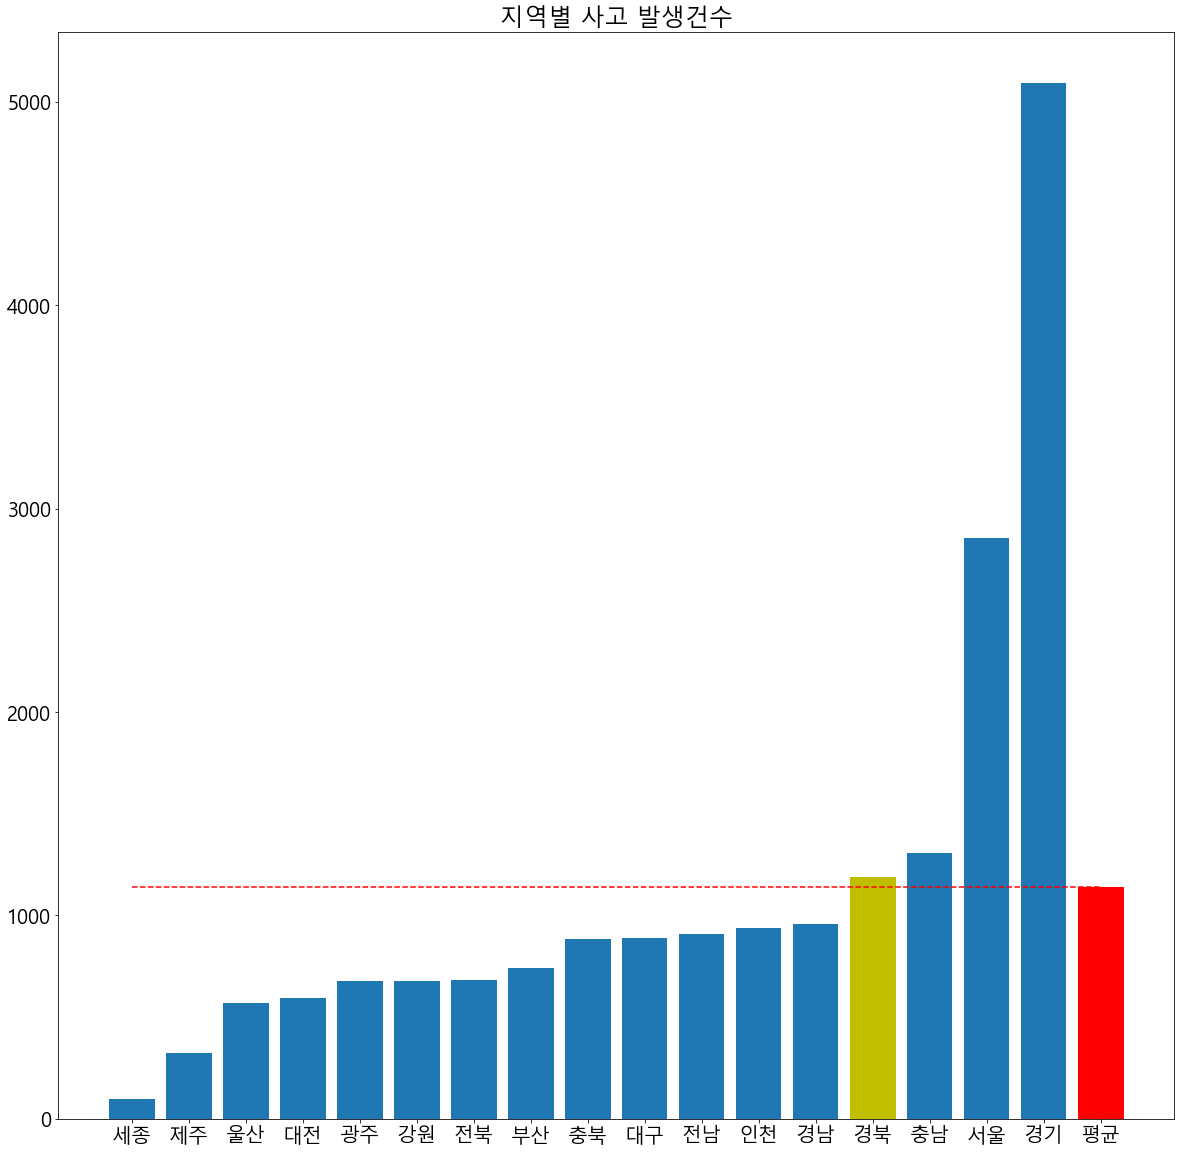

<Figure size 72x72 with 0 Axes>

In [20]:
plt.rc('font',family='Malgun Gothic')
bars=plt.bar(x_pos,total_act,align='center',alpha=1)
bars[act_index.index('평균')].set_color('r')
bars[act_index.index('경북')].set_color('y')
plt.plot([0,17],[total_act_mean,total_act_mean],'r--')
plt.title('지역별 사고 발생건수')
plt.xticks(x_pos,act_index)
plt.rc('font',size=20)
plt.figure(figsize=(1,1))#함수 사이즈
plt.show()

#### 원형 그래프로 그리기

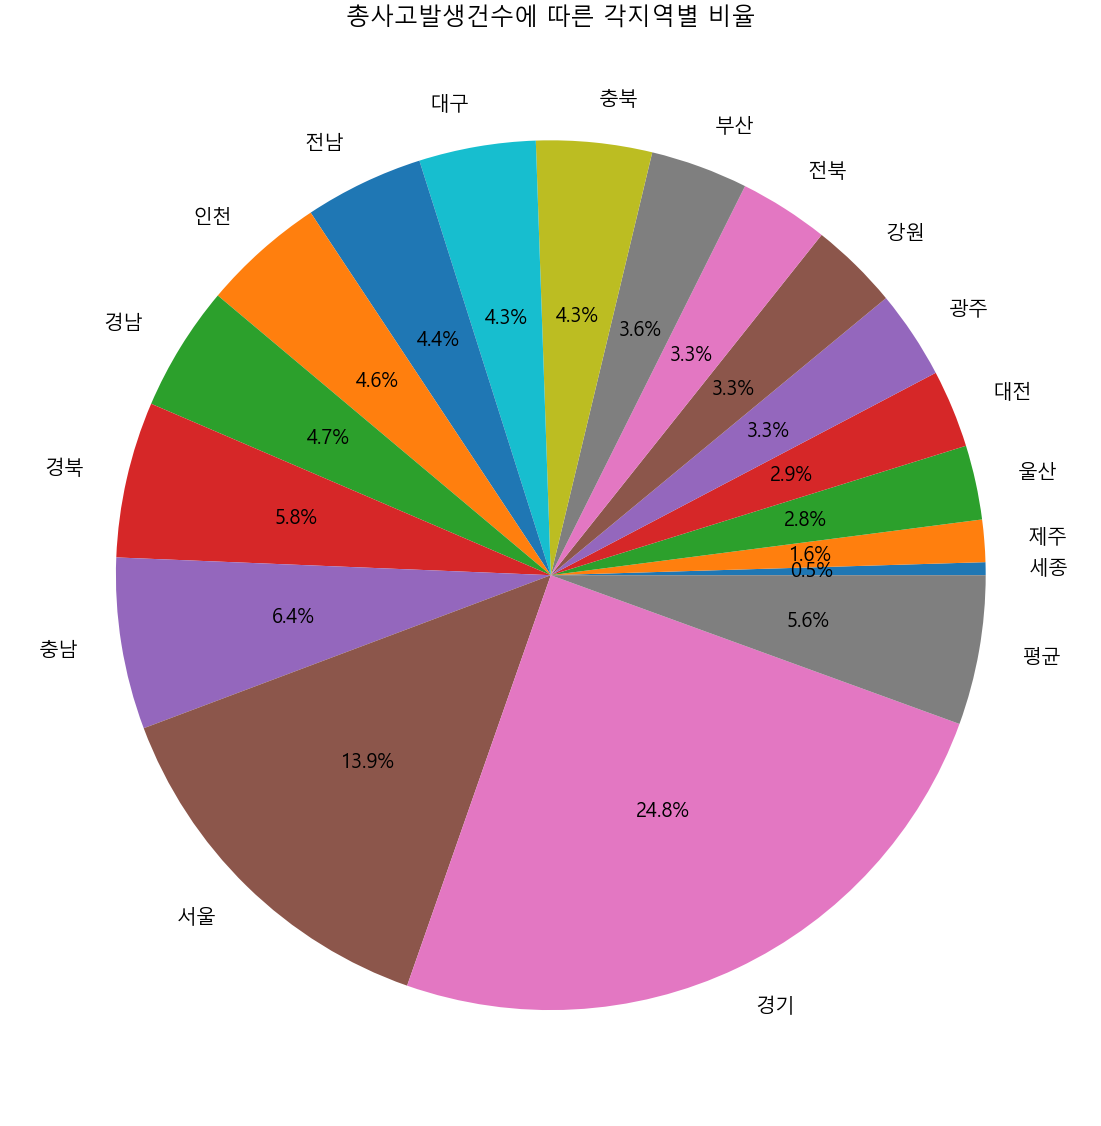

<Figure size 72x72 with 0 Axes>

In [21]:
plt.pie(total_act,labels=act_index,autopct='%.1f%%')
plt.title("총사고발생건수에 따른 각지역별 비율")
plt.rcParams['figure.figsize']=[20,20]#그래프 사이즈
plt.rc('font',size=10)
plt.figure(figsize=(1,1))
plt.show()

In [12]:
cityAct_sum_dead=cityAct_sum.sort_values(by=['사건당 사망자수'],ascending=False)
cityAct_sum_dead

,발생건수,사망자수,부상자수,중상,경상,부상신고,사건당 사망자수,사건당 부상자수
시도,,,,,,,,
경남,958,43,1519,476,979,64,0.04,1.59
충남,1308,40,2132,544,1524,64,0.03,1.63
경북,1190,36,1898,480,1322,96,0.03,1.59
전남,908,25,1472,297,1138,37,0.03,1.62
전북,683,17,1182,220,949,13,0.02,1.73
울산,567,14,913,207,650,56,0.02,1.61
충북,882,20,1503,339,1108,56,0.02,1.70
강원,679,14,1163,227,899,37,0.02,1.71
대구,890,18,1473,281,1109,83,0.02,1.66


In [13]:
dead_index=cityAct_sum_dead.index.tolist()
dead_index.append('평균')
dead_index

['경남',
 '충남',
 '경북',
 '전남',
 '전북',
 '울산',
 '충북',
 '강원',
 '대구',
 '대전',
 '부산',
 '경기',
 '서울',
 '제주',
 '광주',
 '인천',
 '세종',
 '평균']

In [14]:
dead=cityAct_sum_dead['사건당 사망자수'].tolist()
dead_mean=cityAct_sum_dead['사건당 사망자수'].mean()
dead.append(dead_mean)
dead

[0.04488517745302714,
 0.03058103975535168,
 0.030252100840336135,
 0.02753303964757709,
 0.024890190336749635,
 0.024691358024691357,
 0.022675736961451247,
 0.020618556701030927,
 0.020224719101123594,
 0.016835016835016835,
 0.013458950201884253,
 0.01218074656188605,
 0.009453781512605041,
 0.006211180124223602,
 0.005925925925925926,
 0.0042643923240938165,
 0.0,
 0.01851070072393967]

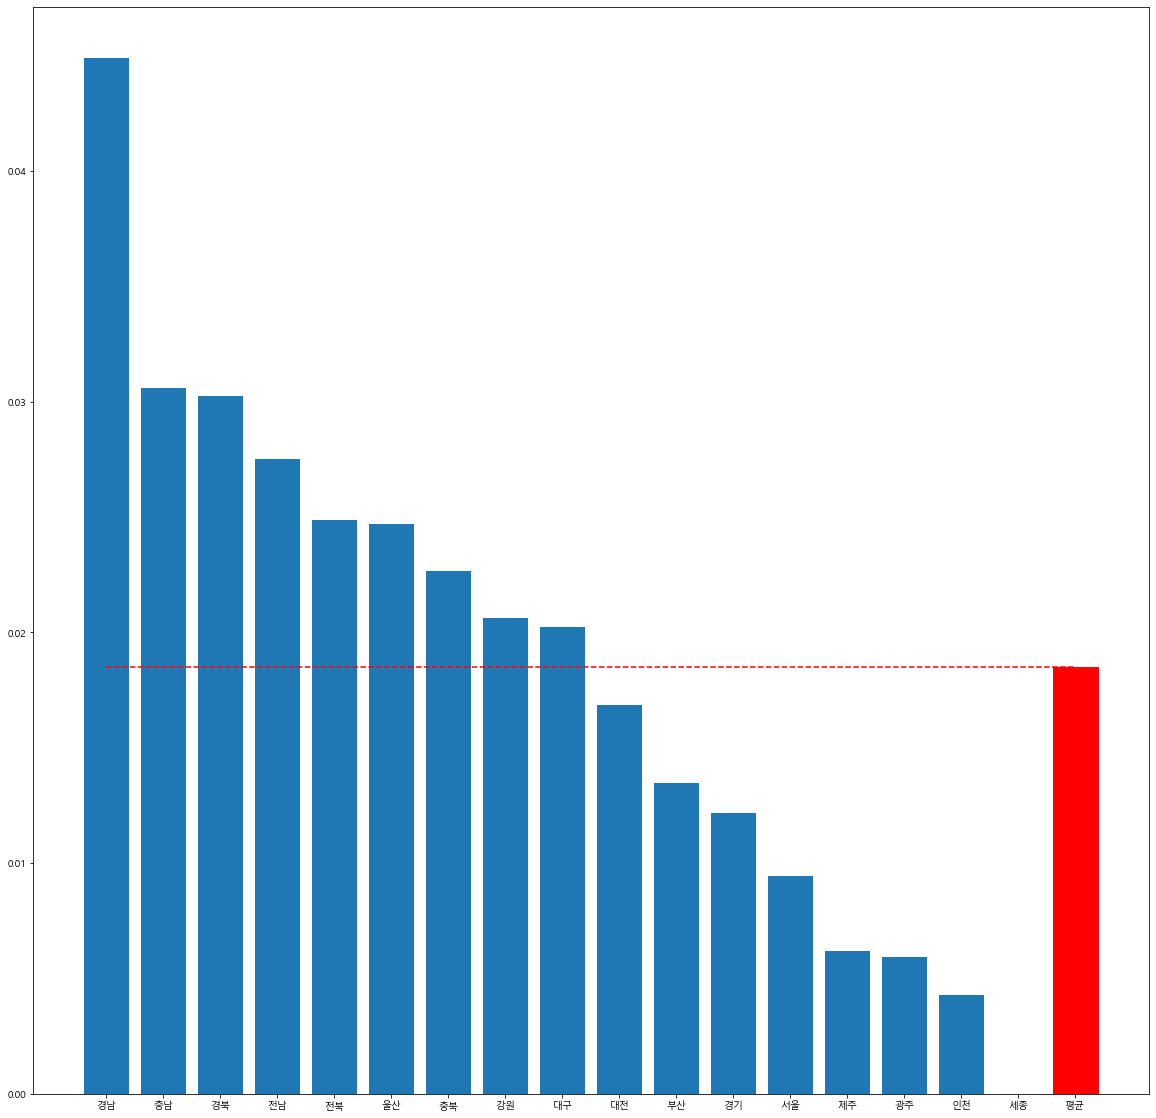

In [15]:
x2_pos=np.arange(len(dead))
bar_list=plt.bar(x2_pos,dead,align='center',alpha=1)
bar_list[dead_index.index('평균')].set_color('r')
plt.plot([0,17],[dead_mean,dead_mean],'r--')
plt.xticks(x2_pos,dead_index)
plt.show()